<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Machine-Learning/Classification/All-Algorithms/wine_quality%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Dataset:-

**This project is to predict the quality of wine**

- **About dataset**
- - **output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent).**
- - - - 

**I am using these three given algorithms to predict the quality of Wine**
- **Algorithms**
- - **Machine Learning Algorithms**
- - -  **1. Random Forest Classifier**

- - -  **2. Stochastic Gradient Descent Classifier**

- - -  **3. Support Vector Classifier(SVC) **
- - **Deep Learning Algorithms**
- - - **Stochastic Gradient Descent with Adam optimizer from keras library**

- **And after this we will be doing validation on all algorithms**

- -  **1. Grid Search CV**

- -  **2. Cross Validation Score**

## Importing required packages.

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [53]:
#Loading dataset
redwine = pd.read_csv('https://bit.ly/2KKr3MU', sep = ';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [55]:
redwine.shape

(1599, 12)

In [56]:
whitewine = pd.read_csv('https://bit.ly/2AxUo8A', sep = ';')
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [57]:
whitewine.shape

(4898, 12)

### make another label for type of wine

In [58]:
whitewine['label'] = ['White' for i in range(len(whitewine))]
whitewine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,White


In [59]:
redwine['label'] = ['Red' for i in range(len(redwine))]
redwine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red


## Combine redwine and whitewine dataset

In [60]:
wines = pd.concat([redwine, whitewine], axis = 0)
wines.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red


### Check no. of unique values in dataset for quality column

In [61]:
wines.quality.nunique()

7

In [62]:
redwine.quality.nunique()

6

In [63]:
whitewine.quality.nunique()

7

## Correlation
Correlation between features and lable

## Red wine correlation

In [46]:
corr = redwine.corr()
corr['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

## whitewine correlation

In [47]:
corr = whitewine.corr()
corr['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

**also we can plot these relations in graphs**

## **Let's do some plotting to know how the data columns are distributed in the dataset**

In [0]:
import warnings
warnings.filterwarnings('ignore')

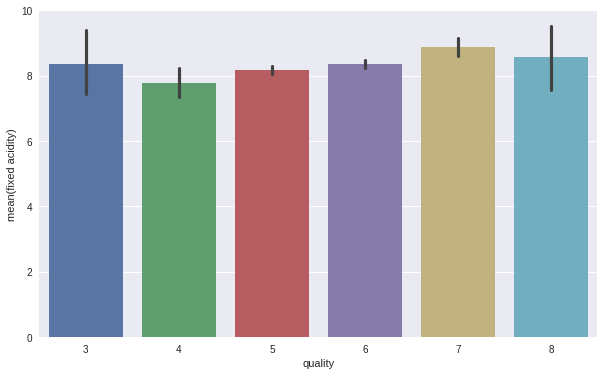

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = redwine)

^^**Here we see that fixed acidity does not give any specification to classify the quality.**

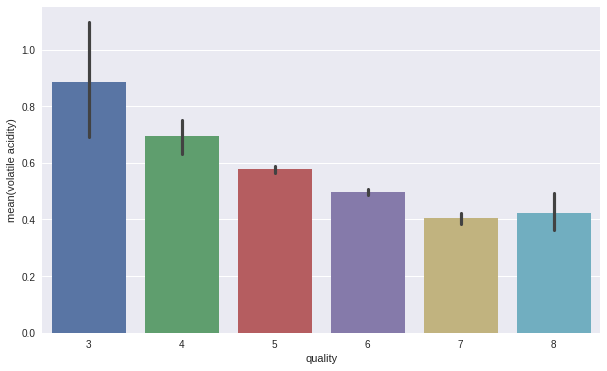

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = redwine)

^^**Here we see that its quite a downing trend in the volatile acidity as we go higher the quality**

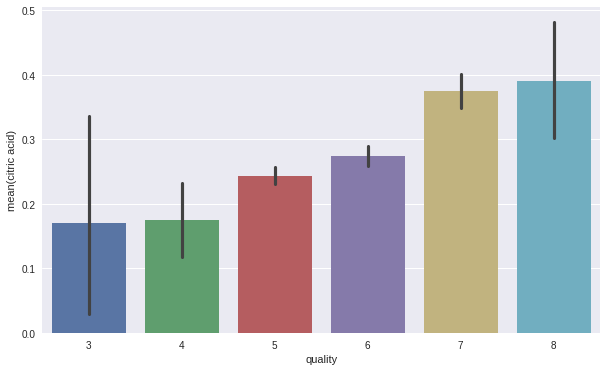

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = redwine)

**^^Composition of citric acid go higher as we go higher in the quality of the wine**

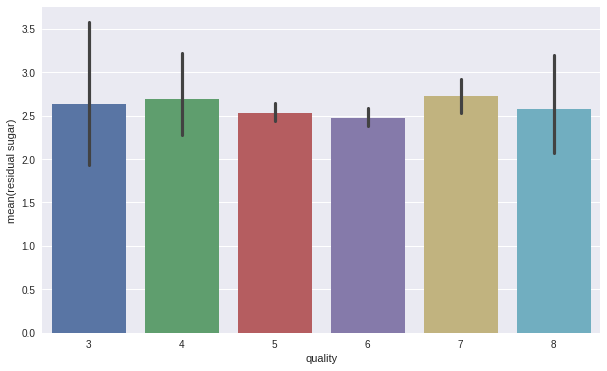

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = redwine)

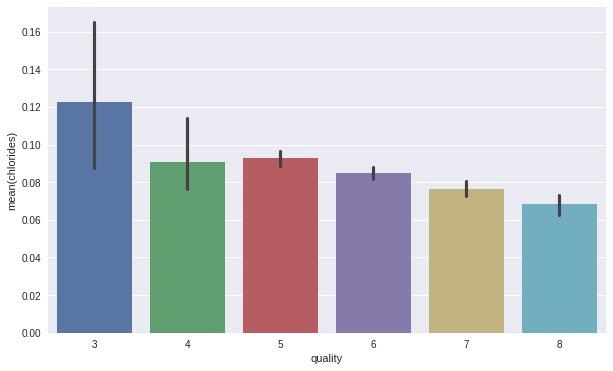

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = redwine)

**^^Composition of chloride also go down as we go higher in the quality of the wine (have strong relation)**

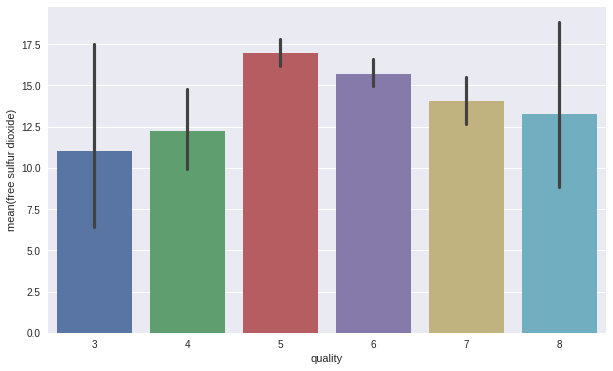

In [19]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = redwine)

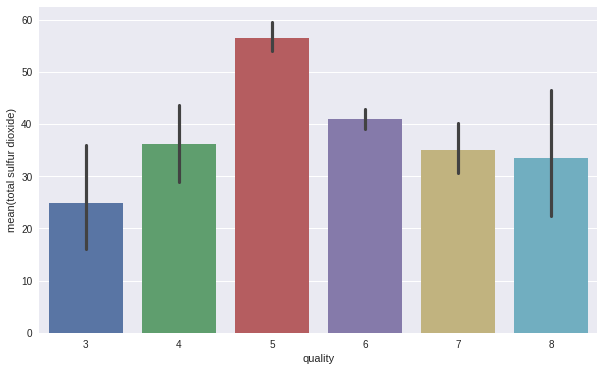

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = redwine)

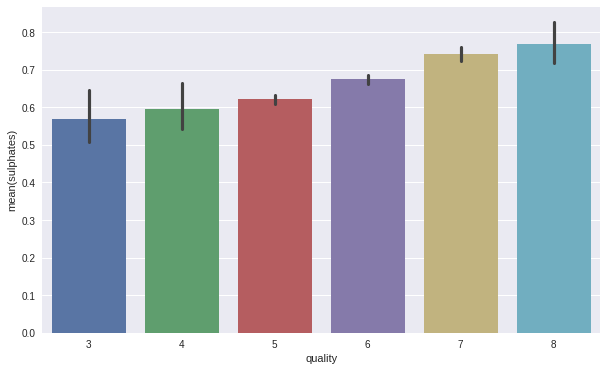

In [21]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = redwine)

**^^Sulphates level goes higher with the quality of wine(low relation)**

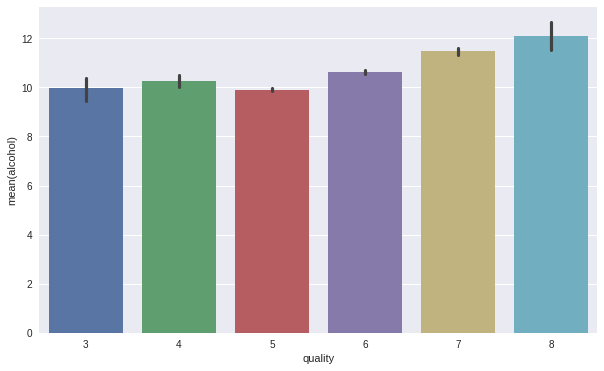

In [22]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = redwine)

**^^Alcohol level also goes higher as te quality of wine increases**

## Preprocessing Data for performing Machine learning algorithms

In [0]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
redwine['quality'] = pd.cut(redwine['quality'], bins = bins, labels = group_names)

In [185]:
redwine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,Red


In [187]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wines['quality'] = pd.cut(wines['quality'], bins = bins, labels = group_names)
wines.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label_White
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad,0


In [188]:
redwine = redwine.iloc[:, :-1]

NameError: ignored

In [189]:
redwine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [190]:
redwine = pd.get_dummies(redwine, drop_first = True)
redwine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_good
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [193]:
redwine['quality_good'].value_counts()

0    1382
1     217
Name: quality_good, dtype: int64

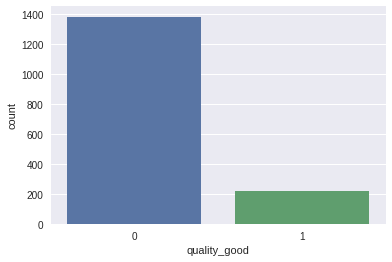

In [195]:
sns.countplot(redwine['quality_good'])

In [0]:
#Now seperate the dataset as response variable and feature variabes
X = redwine.drop('quality_good', axis = 1)
y = redwine['quality_good'].values

In [0]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [0]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [0]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Our training and testing data is ready now to perform machine learning algorithm

### Random Forest Classifier

In [236]:
rfc = RandomForestClassifier(n_estimators=200, max_depth = 4, class_weight = 'balanced', random_state = 0)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.8467552775605942
0.85625


In [0]:
pred_rfc = rfc.predict(X_test)

In [238]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.97      0.86      0.91       273
          1       0.51      0.85      0.63        47

avg / total       0.90      0.86      0.87       320



In [202]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.89      0.96      0.93       273
          1       0.62      0.34      0.44        47

avg / total       0.85      0.87      0.86       320



#### Random forest gives the accuracy of 87%

In [239]:
print(confusion_matrix(y_test, pred_rfc))

[[234  39]
 [  7  40]]


In [203]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[263  10]
 [ 31  16]]




## Stochastic Gradient Decent Classifier

In [273]:
sgd = SGDClassifier(penalty='l2')
sgd.fit(X_train, y_train)
print(sgd.score(X_train, y_train))
print(sgd.score(X_test, y_test))
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, pred_sgd))

0.8717748240813136
0.86875
             precision    recall  f1-score   support

          0       0.88      0.97      0.93       273
          1       0.63      0.26      0.36        47

avg / total       0.85      0.87      0.84       320



#### 87% accuracy using stochastic gradient descent classifier

In [274]:
print(confusion_matrix(y_test, pred_sgd))

[[266   7]
 [ 35  12]]


## Support Vector Classifier

In [295]:
svc = SVC(class_weight = 'balanced')
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

0.838154808444097
0.85625
             precision    recall  f1-score   support

          0       0.99      0.84      0.91       273
          1       0.51      0.94      0.66        47

avg / total       0.92      0.86      0.87       320



In [301]:
redwine['quality_good'].value_counts()

0    1382
1     217
Name: quality_good, dtype: int64

In [331]:
svc = SVC(class_weight = {0:1, 1:2.5})
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

0.9124315871774824
0.8875
             precision    recall  f1-score   support

          0       0.94      0.93      0.93       273
          1       0.61      0.66      0.63        47

avg / total       0.89      0.89      0.89       320



In [332]:
print(confusion_matrix(y_test, pred_svc))

[[253  20]
 [ 16  31]]


In [319]:
print(confusion_matrix(y_test, pred_svc))

[[244  29]
 [ 12  35]]


#### Support vector classifier gets 86%

## Let's try to increase our accuracy of models
## Grid Search CV

In [0]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv= 3, verbose = 1, )

In [293]:
grid_svc.fit(X_train, y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=1)]: Done 384 out of 384 | elapsed:   15.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [294]:
#Best parameters for our svc model
best = grid_svc.best_params_
best

{'C': 1.1, 'gamma': 1.1, 'kernel': 'rbf'}

In [290]:
C = best.get('C')
gamma = best.get('gamma')
kernel = best.get('kernel')
C, gamma, kernel

(1.1, 1.1, 'rbf')

In [416]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = C, gamma =  gamma, kernel= kernel)
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

             precision    recall  f1-score   support

          0       0.89      0.99      0.94       273
          1       0.87      0.28      0.42        47

avg / total       0.89      0.89      0.86       320



In [418]:
confusion_matrix(y_test, pred_svc2)

array([[271,   2],
       [ 34,  13]])

### SVC improves from 86% to 90% using Grid Search CV

## Cross Validation Score for random forest and SGD

In [0]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

### Random forest accuracy increases from 87% to 91 % using cross validation score

# Deep Learnig

In [333]:
redwine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_good
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0


In [337]:
X_train[:2]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174]])

In [343]:
y_train[:2]

array([0, 0], dtype=uint8)

## Feature Scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
def tanhconv(x):
  if x == 0:
    return -1
  if x == 1:return 1
    

# From Scratch

In [429]:
model = tf.keras.models.Sequential([
  #tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation=tf.nn.tanh)
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 8, #class_weight = {0:1, 1:1.7}
         )
model.evaluate(X_test, y_test)

Epoch 1/8
1279/1279 [==============================] - 4s 3ms/step - loss: 0.9841 - acc: 0.8765
Epoch 2/8
1279/1279 [==============================] - 0s 200us/step - loss: 0.8871 - acc: 0.8718
Epoch 3/8
1279/1279 [==============================] - 0s 216us/step - loss: 0.8456 - acc: 0.8061
Epoch 4/8
1279/1279 [==============================] - 0s 204us/step - loss: 0.8370 - acc: 0.8155
Epoch 5/8
1279/1279 [==============================] - 0s 202us/step - loss: 0.8406 - acc: 0.8616
Epoch 6/8
1279/1279 [==============================] - 0s 206us/step - loss: 0.9845 - acc: 0.8929
Epoch 7/8
1279/1279 [==============================] - 0s 208us/step - loss: 0.7238 - acc: 0.8835
Epoch 8/8
320/320 [==============================] - 2s 6ms/step


[0.6840350389480591, 0.865625]

In [420]:
gy_pred = model.predict_classes(X_test)
y_pred[:2]

array([[0],
       [0]], dtype=int32)

In [421]:
confusion_matrix(y_test, y_pred)

array([[249,  24],
       [ 22,  25]])

In [402]:
confusion_matrix(y_test, y_pred)

array([[249,  24],
       [ 18,  29]])

In [0]:
print(classification_report())

## LabelEncoding for lable

In [114]:
import numpy as np
label = np.zeros((len(y_train), 7))
label[:2]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

3, 4, 5, 6, 7, 8, 9

In [0]:
for n, i in enumerate(y_train):
  label[n][i - 3] = 1
  

In [120]:
label[:2]

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

In [121]:
y_train[:2]

array([5, 4])

In [122]:
y_train = label
y_train[:2]

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

In [131]:
y_train.shape

(4547, 7)

In [123]:
import numpy as np
label = np.zeros((len(y_test), 7))
label[:2]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [0]:
for n, i in enumerate(y_test):
  label[n][i - 3] = 1
  

In [128]:
label[:4]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]])

In [129]:
y_test[:4]

array([6, 6, 6, 5])

In [130]:
y_test = label
y_test.shape

(1950, 7)

## Train model

In [132]:
X_train.shape, X_test.shape

((4547, 12), (1950, 12))

In [133]:
np.sqrt(200)**-1

0.07071067811865475

In [135]:
200**-(1/2)

0.07071067811865475

In [0]:
learning_rate, epochs, layer1_shape, output_shape = (0.0001, 300, 300, 7)
np.random.seed(1)
m1 = X_train.shape[1]
sigma1 = m1 ** (-1/2)
weights_1 = sigma1 * np.random.randn(m1, layer1_shape)

m2 = layer1_shape
sigma2 = m2 ** (-1/2)

weights_out = sigma2 * np.random.randn(m2, output_shape)

In [158]:
weights_1[2][:2]

array([-0.30973811,  0.14293998])

In [159]:
weights_1.shape

(12, 300)

In [160]:
weights_out.shape

(300, 7)

In [161]:
import sys
def tanh(x):
    return np.tanh(x)

def tanh2deriv(output):
    return 1 - (output ** 2)

def softmax(x):
    temp = np.exp(x)
    return temp / np.sum(temp, axis=1, keepdims=True)
  
batch_size = 1
train_error = []
test_error = []
for j in range(epochs):
    correct_cnt = 0
    for i in range(int(len(X_train) / batch_size)):
        batch_start, batch_end=((i * batch_size),((i+1)*batch_size))
        layer_0 = X_train[batch_start:batch_end]
        layer_1 = tanh(np.dot(layer_0,weights_1))
        dropout_mask = np.random.randint(2,size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = softmax(np.dot(layer_1,weights_out))
        for k in range(batch_size):
            correct_cnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(y_train[batch_start+k:batch_start+k+1]))

        layer_2_delta = (y_train[batch_start:batch_end]-layer_2) / (batch_size * layer_2.shape[0])
        layer_1_delta = layer_2_delta.dot(weights_out.T) * tanh2deriv(layer_1)
        layer_1_delta *= dropout_mask
        weights_out += learning_rate * layer_1.T.dot(layer_2_delta)
        weights_1 += learning_rate * layer_0.T.dot(layer_1_delta)
    train_error.append(correct_cnt/len(X_train))
    
    #for test_images
    test_correct_cnt = 0
    for i in range(len(X_test)):

        layer_0 = X_test[i:i+1]
        layer_1 = tanh(np.dot(layer_0,weights_1))
        layer_2 = np.dot(layer_1,weights_out)

        test_correct_cnt += int(np.argmax(layer_2) == np.argmax(y_test[i:i+1]))
    test_error.append(test_correct_cnt/len(X_test))
    if(j % 10 == 0):
        sys.stdout.write("\n"+ \
         "I:" + str(j) + \
         " Test-Acc:"+str(test_correct_cnt/float(len(X_test)))+\
         " Train-Acc:" + str(correct_cnt/float(len(X_train))))
  


I:0 Test-Acc:0.43333333333333335 Train-Acc:0.3463822300417858
I:10 Test-Acc:0.4625641025641026 Train-Acc:0.4761381130415659
I:20 Test-Acc:0.47435897435897434 Train-Acc:0.5036287662194854
I:30 Test-Acc:0.47333333333333333 Train-Acc:0.509566747305916
I:40 Test-Acc:0.4774358974358974 Train-Acc:0.51638442929404
I:50 Test-Acc:0.47333333333333333 Train-Acc:0.5207829338025072
I:60 Test-Acc:0.47384615384615386 Train-Acc:0.51638442929404
I:70 Test-Acc:0.47333333333333333 Train-Acc:0.5245216626347042
I:80 Test-Acc:0.4748717948717949 Train-Acc:0.5282603914669013
I:90 Test-Acc:0.4723076923076923 Train-Acc:0.5311194193974049
I:100 Test-Acc:0.47692307692307695 Train-Acc:0.5297998680448648
I:110 Test-Acc:0.4748717948717949 Train-Acc:0.5196833076753904
I:120 Test-Acc:0.47435897435897434 Train-Acc:0.5308994941719816
I:130 Test-Acc:0.4764102564102564 Train-Acc:0.534858148229602
I:140 Test-Acc:0.47435897435897434 Train-Acc:0.5346382230041786
I:150 Test-Acc:0.47384615384615386 Train-Acc:0.527820541016054